<a href="https://colab.research.google.com/github/pradeep91k/Complete-Python-3-Bootcamp/blob/master/SIT742Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Student ID : 224631972
#### Student Name: Maneesh Kumar
#### Student ID : 224637442
#### Student Name: Pradeep Kumar
#### Student ID :
#### Student Name:
#### Attempted High Distinction Question: Yes

## Part 1

### Answer 1.1

In [19]:
import gzip
import shutil
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace, when

# Initialize Spark session
spark = SparkSession.builder.appName("RevenueAnalysis").getOrCreate()

# Unzip the .gz file and write it to a temporary CSV file
with gzip.open('transactionrecord.gz', 'rb') as f_in:
    with open('transactionrecord.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Read the CSV file into a PySpark dataframe
df = spark.read.csv('transactionrecord.csv', header=True, inferSchema=True)

# Show the first few rows to verify the content
df.show(5)



+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
+-------------+---------+---------+--------------------+----------------+-----+-

In [20]:
# 1.1.1 Replace 'NA' with '-1' in CustomerNo
df = df.withColumn("CustomerNo", when(col("CustomerNo") == "NA", "-1").otherwise(col("CustomerNo")))

# 1.1.2 Process productName and create a new column with only alphabet characters
df = df.withColumn("productName_process", regexp_replace(col("ProductName"), "[^a-zA-Z]", ""))

# Show the first 5 rows after wrangling
df.show(5)


+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|SetOfWoodenMarket...|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|ChristmasStarWish...|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|StorageTinVintage...|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|TreeTLightHolderW...|
|       581475|12/9/2019|    23239|Set Of 4 Knic

### Answer 1.2

In [27]:
import pandas as pd

# 1.2.1 Calculate revenue (price * Quantity) as float
df = df.withColumn("revenue", (col("Price") * col("Quantity")).cast("float"))

# 1.2.2 Convert PySpark DataFrame to Pandas DataFrame
df_pandas = df.toPandas()

# 1.2.2 (Continued) Create transaction_date column and format as date
df_pandas["transaction_date"] = pd.to_datetime(df_pandas["Date"], format="%m/%d/%Y")

# Show top 5 rows of Pandas DataFrame
print(df_pandas.head())


  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

  Product_category  Price  Quantity CustomerNo         Country  \
0              0ca  21.47        12      17490  United Kingdom   
1              0ca  10.65        36      13069  United Kingdom   
2              0ca  11.53        12      13069  United Kingdom   
3              0ca  10.65        12      13069  United Kingdom   
4              0ca  11.94         6      13069  United Kingdom   

               productName_process     revenue transaction_date  
0          SetOfWoodenMarketCrates  257.640015       2019-12-09  
1  Chris

### Answer 1.3

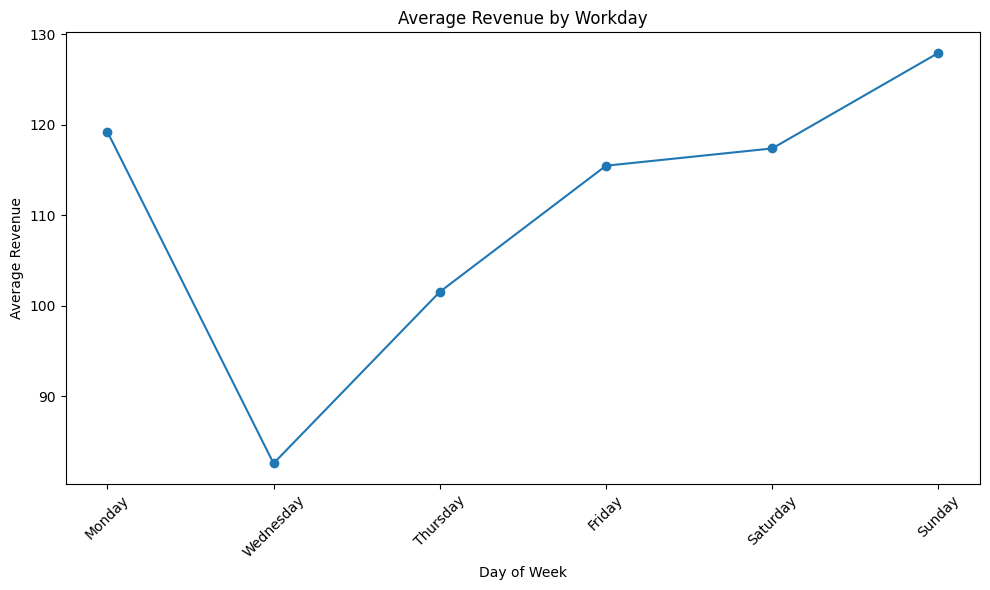

Workday with Most Sales: Sunday


In [11]:
import matplotlib.pyplot as plt

# 1.3.1 Workday with Most Sales (Line Chart)
# Group by day of the week and calculate average revenue
df_grouped_day = (
    df_pandas.groupby(df_pandas["transaction_date"].dt.dayofweek)
    .agg(avg_revenue=("revenue", "mean"))
    .reset_index()
)

# Map day of the week integer to day names
day_of_week_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_grouped_day["day_name"] = df_grouped_day["transaction_date"].map(day_of_week_map)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped_day["day_name"], df_grouped_day["avg_revenue"], marker='o')
plt.xlabel("Day of Week")
plt.ylabel("Average Revenue")
plt.title("Average Revenue by Workday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find the workday (day of week) with the most sales
most_sales_day = df_grouped_day.sort_values(by="avg_revenue", ascending=False).iloc[0]["day_name"]
print(f"Workday with Most Sales: {most_sales_day}")



In [12]:
# Ensure the transaction_date is in datetime format
df_pandas["transaction_date"] = pd.to_datetime(df_pandas["transaction_date"], errors='coerce')

# Check if the transaction_date is now a proper datetime object
print(df_pandas["transaction_date"].dtype)  # Should output 'datetime64[ns]'

# 1.3.1 has already calculated the workday with the most sales.
# Sort the day of the week by average revenue and get the day with the highest sales
most_sales_day_of_week = df_grouped_day.sort_values(by="avg_revenue", ascending=False).iloc[0]["transaction_date"]

# Filter the dataset for transactions that occurred on that workday (most_sales_day_of_week)
df_filtered_day = df_pandas[df_pandas["transaction_date"].dt.dayofweek == most_sales_day_of_week]

# Group by productName_process and calculate total revenue and total quantity
df_day_product_grouped = df_filtered_day.groupby("productName_process").agg(
    total_revenue=("revenue", "sum"),
    total_quantity=("Quantity", "sum")
).reset_index()

# Find the product with the highest revenue on that workday
top_revenue_product_day = df_day_product_grouped.sort_values(by="total_revenue", ascending=False).iloc[0]
print(f"Product with the highest revenue on {most_sales_day}: {top_revenue_product_day['productName_process']} with revenue {top_revenue_product_day['total_revenue']}")

# Find the product with the highest sales volume (quantity) on that workday
top_quantity_product_day = df_day_product_grouped.sort_values(by="total_quantity", ascending=False).iloc[0]
print(f"Product with the highest sales volume on {most_sales_day}: {top_quantity_product_day['productName_process']} with quantity {top_quantity_product_day['total_quantity']}")


datetime64[ns]
Product with the highest revenue on Sunday: WorldWarGlidersAsstdDesigns with revenue 187081.34375
Product with the highest sales volume on Sunday: WorldWarGlidersAsstdDesigns with quantity 18051


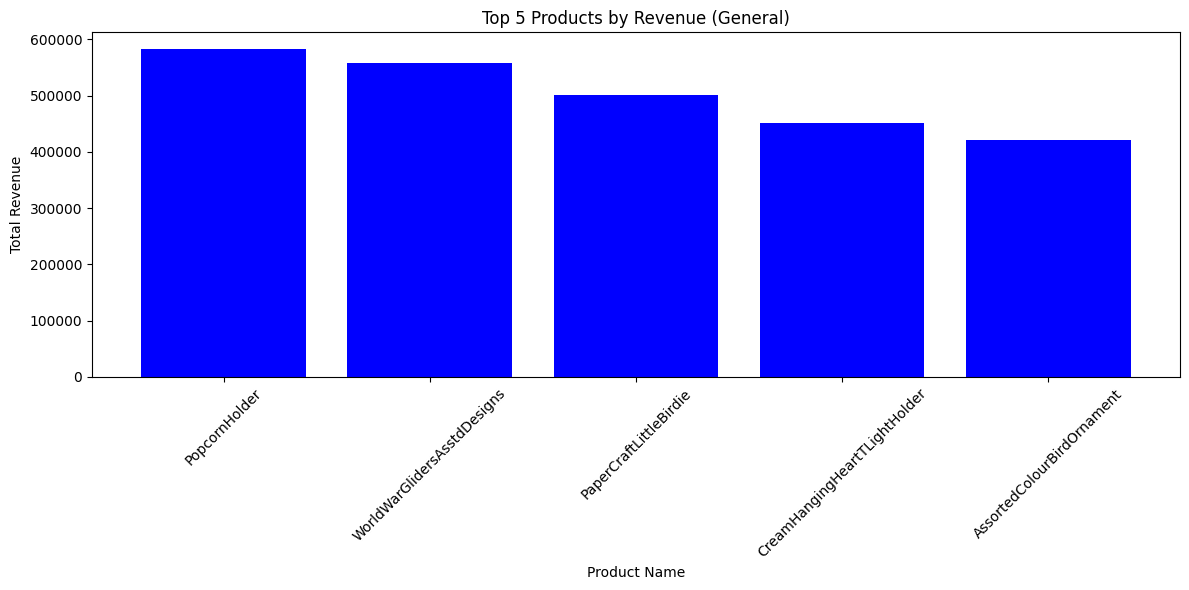

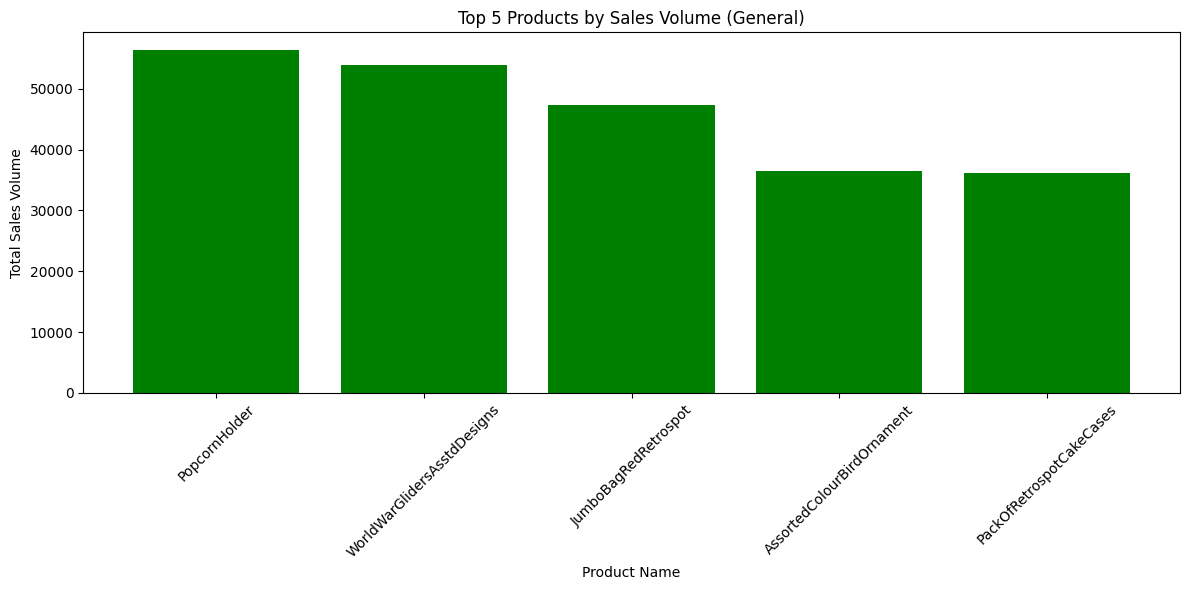

In [13]:
# 1.3.3 Top Products by Revenue (General)
top_revenue_products_general = (
    df_pandas.groupby("productName_process")
    .agg(total_revenue=("revenue", "sum"))
    .reset_index()
    .sort_values(by="total_revenue", ascending=False)
    .head(5)
)

# Plotting Top 5 Products by Revenue
plt.figure(figsize=(12, 6))
plt.bar(top_revenue_products_general["productName_process"], top_revenue_products_general["total_revenue"], color='blue')
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.title("Top 5 Products by Revenue (General)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 1.3.3 Top Products by Sales Volume (General)
top_volume_products_general = (
    df_pandas.groupby("productName_process")
    .agg(total_quantity=("Quantity", "sum"))
    .reset_index()
    .sort_values(by="total_quantity", ascending=False)
    .head(5)
)

# Plotting Top 5 Products by Sales Volume
plt.figure(figsize=(12, 6))
plt.bar(top_volume_products_general["productName_process"], top_volume_products_general["total_quantity"], color='green')
plt.xlabel("Product Name")
plt.ylabel("Total Sales Volume")
plt.title("Top 5 Products by Sales Volume (General)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Answer 1.4

### Answer 1.5

### Answer 1.6

### Answer 1.7

### Answer 1.8

### Answer 1.9

### Answer 1.10

## Part 2

### Answer 2.1

In [52]:
df_pandas.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,revenue,transaction_date
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,SetOfWoodenMarketCrates,257.640015,2019-12-09
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,ChristmasStarWishListChalkboard,383.399994,2019-12-09
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,StorageTinVintageLeaf,138.360001,2019-12-09
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,TreeTLightHolderWillieWinkie,127.800003,2019-12-09
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,SetOfKnickKnackTinsPoppies,71.639999,2019-12-09


In [46]:
# Reset the index to make 'transaction_date' a column again
df_pandas_reset = df_pandas.reset_index()
df_pandas_reset

,index,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,revenue,transaction_date
0,0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,SetOfWoodenMarketCrates,257.640015,2019-12-09
1,1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,ChristmasStarWishListChalkboard,383.399994,2019-12-09
2,2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,StorageTinVintageLeaf,138.360001,2019-12-09
3,3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,TreeTLightHolderWillieWinkie,127.800003,2019-12-09
4,4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,SetOfKnickKnackTinsPoppies,71.639999,2019-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536345,536345,C536548,12/1/2018,22168,Organiser Wood Antique White,0ca,18.96,-2,12472,Germany,OrganiserWoodAntiqueWhite,-37.919998,2018-12-01
536346,536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,0ca,14.09,-3,12472,Germany,RedSpottyBiscuitTin,-42.270000,2018-12-01
536347,536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,0ca,11.74,-1,12472,Germany,PorcelainHangingBellSmall,-11.740000,2018-12-01
536348,536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,0ca,16.35,-4,12472,Germany,AdventCalendarGinghamSack,-65.400002,2018-12-01


In [47]:
# Check for duplicates
duplicate = df_pandas_reset[df_pandas_reset.duplicated('transaction_date', keep=False)]
print(duplicate.duplicated().sum())

0


In [48]:
df_pandas_aggregated = df_pandas_reset.groupby('transaction_date').agg({'revenue': 'mean'}).reset_index()

In [49]:
# Set the index and reindex again
df_pandas_aggregated.set_index('transaction_date', inplace=True)
full_date_range = pd.date_range(start=df_pandas_aggregated.index.min(), end=df_pandas_aggregated.index.max())
df_full = df_pandas_aggregated.reindex(full_date_range, fill_value=df_pandas_aggregated['revenue'].mean())
df_full['transaction_date'] = df_full.index

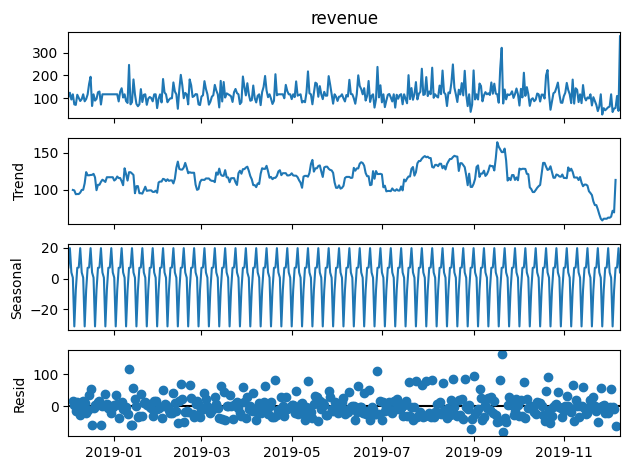

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
decomposition = seasonal_decompose(df_full['revenue'],model='additive')
decomposition.plot();

### Answer 2.2

### Answer 2.3

## Thank you